In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Loading XML Data

In [ ]:
file_path = './sample.xml'

Processing XML Data and Creating a DataFrame

In [3]:
df = pd.DataFrame([], columns=['date', 'bpm'])

pattern = '^.*IdentifierHeartRate".*startDate="(.{19}).*value="([0-9]*).*$'

# Open and process the XML file line by line
with open(file_path, 'r') as f:
    data = []  # Use a list to collect rows before creating the DataFrame
    for line in f:
        search = re.search(pattern, line)
        if search:
            # Append each row as a dictionary to the list
            data.append({'date': search.group(1), 'bpm': search.group(2)})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Convert 'date' column to datetime and 'bpm' column to numeric
df['date'] = pd.to_datetime(df['date'])
df['bpm'] = pd.to_numeric(df['bpm'])

# Set the 'date' column as the index and sort by it
df = df.set_index('date').sort_index()

# Display the first few rows of the DataFrame
print(df.head())

                     bpm
date                    
2021-11-03 15:08:00   67
2021-11-03 15:09:46   72
2021-11-03 15:14:18   68
2021-11-03 15:14:50   64
2021-11-03 15:23:02   68


Visualizing Heart Rate Data with a Line Plot

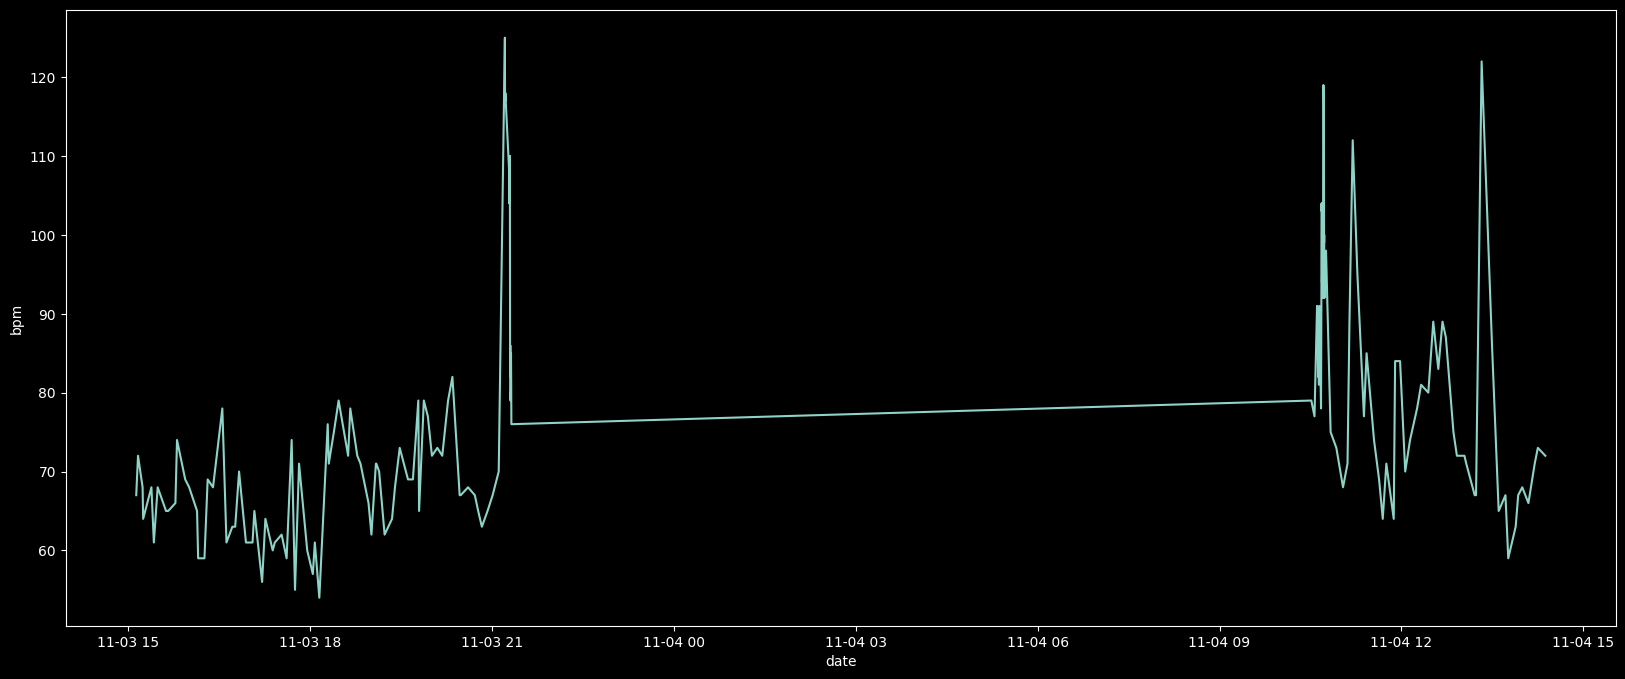

In [4]:
	
plt.figure(figsize=(20, 8))
sns.lineplot(x=df.index, y=df.bpm)
plt.show()

Visualizing Heart Rate Distribution with a Kernel Density Estimate (KDE) Plot

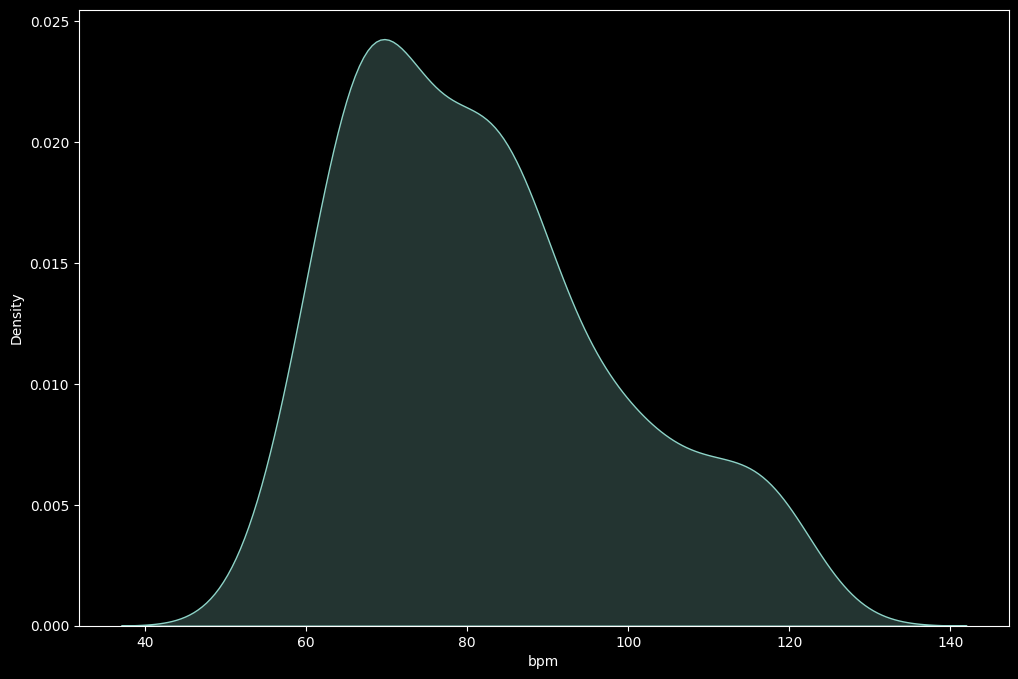

In [5]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x=df.bpm, fill=True)
plt.show()

Extracting Data for a Specific Data

In [13]:
df_211103 = df.loc['2021-11-03']

df_211103

,bpm
date,
2021-11-03 15:08:00,67
2021-11-03 15:09:46,72
2021-11-03 15:14:18,68
2021-11-03 15:14:50,64
2021-11-03 15:23:02,68
...,...
2021-11-03 21:18:58,81
2021-11-03 21:19:00,81
2021-11-03 21:19:04,81


Visualizing Heart Rate on a Specific Data

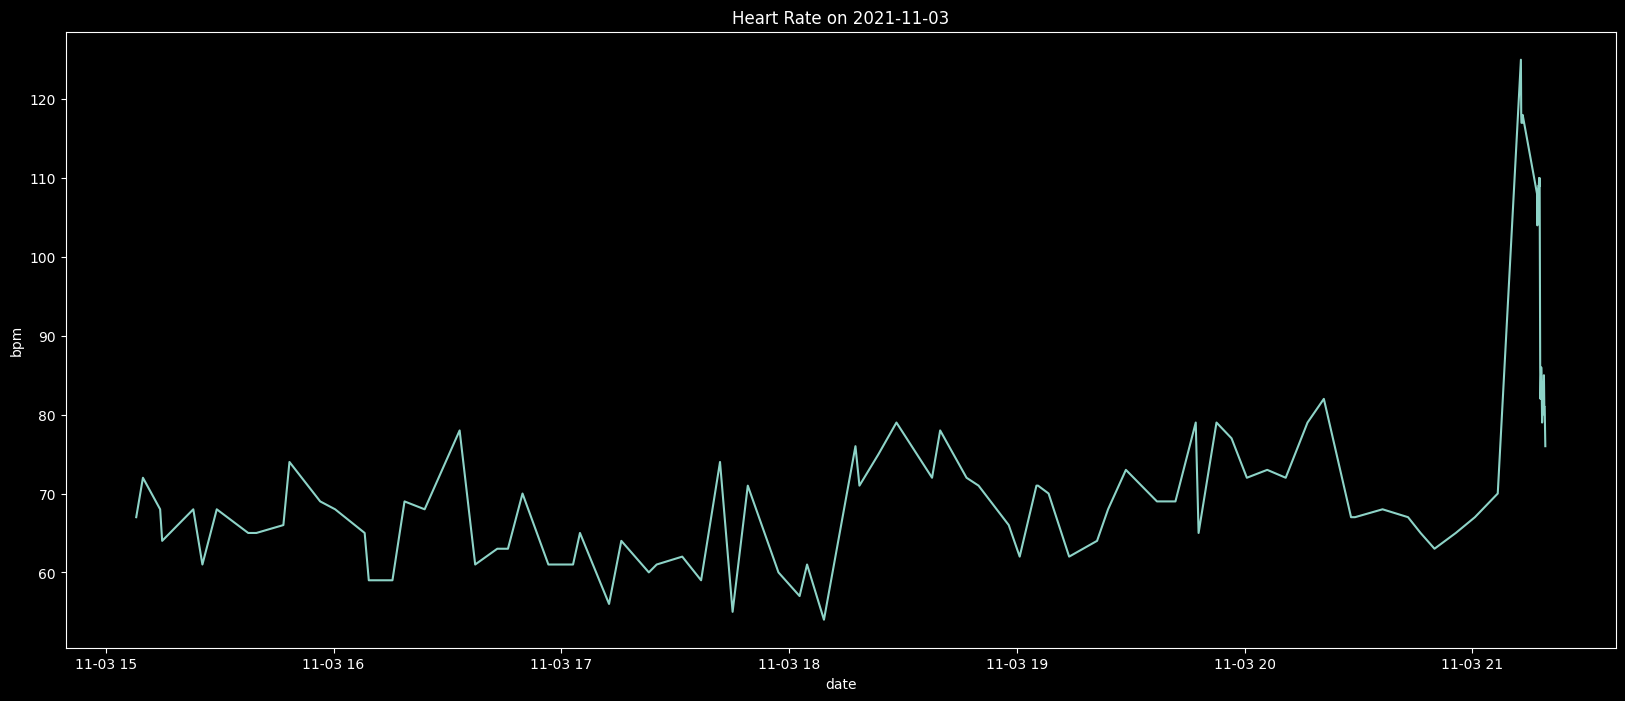

In [19]:
plt.figure(figsize=(20, 8)) 
sns.lineplot(x=df_211103.index, y=df_211103.bpm)
plt.title("Heart Rate on 2021-11-03")
plt.show()

Adding Annotations for Specific Events

In [27]:
notes = [{
        'time': '2021-11-03 16:30:00',
        'note': 'Exam'
    }, {
        'time': '2021-11-03 18:30:00',
        'note': 'Coding'
    }, {
        'time': '2021-11-03 21:10:00',
        'note': 'Dinner'
}]

Finding the Nearest Timestamp to a Tartget Time

In [28]:
import numpy as np

# Convert note times to pandas datetime
note_times = pd.to_datetime([note['time'] for note in notes])

# Define the target datetime
dt = pd.to_datetime('2021-11-03 13:45:00')  # Example time

# Calculate the nearest index manually using np.abs
nearest_idx = np.abs(df_211103.index - dt).argmin()

# Print the nearest timestamp and corresponding bpm
nearest_time = df_211103.index[nearest_idx]
nearest_bpm = df_211103.iloc[nearest_idx].bpm

print(f"Nearest time: {nearest_time}, BPM: {nearest_bpm}")


Nearest time: 2021-11-03 15:08:00, BPM: 67


Annotating Heart Rate Data with Key Events

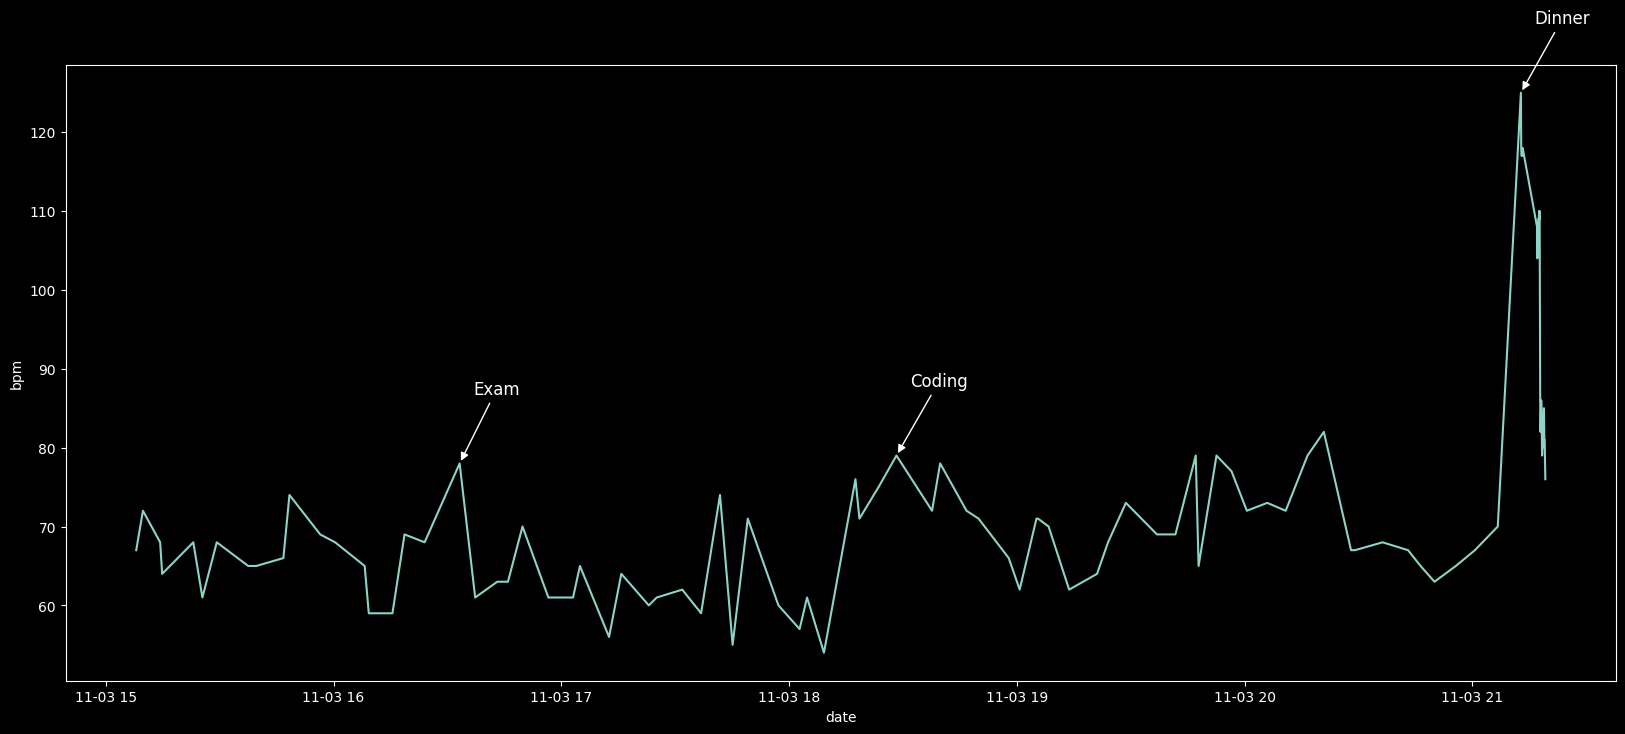

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heart rate data
plt.figure(figsize=(20, 8))
sns.lineplot(x=df_211103.index, y=df_211103.bpm)

# Annotate with notes
for note in notes:
    dt = pd.to_datetime(note['time'])  # Convert note time to datetime
    
    # Find the nearest index manually
    idx = np.abs(df_211103.index - dt).argmin()
    
    # Add annotation
    plt.annotate(
        note['note'],
        (df_211103.iloc[idx].name, df_211103.iloc[idx].bpm),  # Nearest time and bpm
        xytext=(10, 50),  # Offset for annotation
        textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', color='white'),
        fontsize=12,
        color='white'
    )

# Show the plot
plt.show()
